In [1]:
# Import the relevant modules
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
from math import pi
import trackpy
from iris.time import PartialDateTime
import tobac
import warnings

In [2]:
# Import the libraries
import functions
import dictionaries

In [3]:
# Set up the warning messages
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

In [4]:
# Load the olr and precip data
olr, time_olr, datetimes_olr, con_olr = functions.load_olr_data(dictionaries.data_file)

# Load the precip data
precip, time_precip, datetimes_precip, con_precip = functions.load_precip_data(dictionaries.precip)

In [5]:
# Set up the directory to save the data
savedir, plot_dir = functions.setup_directories()

In [6]:
# Extract longitude and latitude
longitude,latitude=np.meshgrid(olr.coord('longitude').points,olr.coord('latitude').points)

# Calculate dxy
dxy, dt = functions.calculate_dxy(longitude, latitude, olr)

In [7]:
#sigma = dictionaries.sigma

#tf = (olr.data/sigma)**(0.25)
#tb_var = (-dictionaries.a + np.sqrt(dictionaries.a**2 + 4*dictionaries.b*tf.data))/(2*dictionaries.b)

In [8]:
# Calculate brightness temperatures
tf, tb_var, tb = functions.calculate_temperatures(dictionaries.a, dictionaries.b, dictionaries.sigma, olr)

In [9]:
# Set up the parameters dictionaries
# features parameters
parameters_features = functions.setup_parameters_features(dictionaries.position_threshold, dictionaries.sigma_threshold, dictionaries.target, dictionaries.threshold, dictionaries.n_min_threshold)

# segmentation parameters
parameters_segmentation = functions.setup_parameters_segmentation(dictionaries.target, dictionaries.method, dictionaries.threshold)

# linking parameters
parameters_linking = functions.setup_parameters_linking(dictionaries.n_min_threshold, dictionaries.stubs, dictionaries.order, dictionaries.extrapolate, dictionaries.memory, dictionaries.adaptive_stop, dictionaries.adaptive_step, dictionaries.subnetwork_size, dictionaries.method_linking)

In [10]:
# Now perform the sensitivity analysis
print("Values of nminthreshold to be tested: ", dictionaries.n_min_threshold_values)
n_min_threshold_values=dictionaries.n_min_threshold_values

# Call the sensitivity analysis function
functions.perform_sensitivity_analysis(tb, savedir, parameters_features, parameters_segmentation, parameters_linking, n_min_threshold_values)

Frame 743: 17 trajectories present.
[14.74255352 16.77181246 10.31377609 13.86950642 18.18599578  8.36144574
  7.94717128 11.88144266 22.11117279  8.95132508 14.0793288  12.2857219
  9.82481941 12.62346059 13.38315648 12.58019558  9.87240246 16.44563237
 18.21170054 27.16393591 13.51440783  9.90884788 13.43928464 12.24006639
  3.60826005 21.59167314 12.14644213 28.08226801 19.85758091  3.87040611
 21.93197688 12.16800737 23.4570942  19.33407769 16.60460604 12.29298834
 21.56151833 18.28556626  8.41241164 13.9842896  23.7875025  14.15910931
 18.54160213 16.96523024 10.51440668 13.82147117  8.38950801  4.00241032
 17.46635734 15.62986855 14.37724676 15.18146569 10.56837036 21.79702275
 17.41784826 14.48294988  5.85990903 16.63605925  9.32965082 13.520867
 10.66048166  7.18594276 10.50284371 14.66238437 17.482914    9.17603996
 15.38624685 18.18966102 18.82450263 15.56325525  5.94869894 10.22619819
 15.33047966 12.93873355 12.51678046 27.19750862 15.58056503 11.35369574
 18.46520509  7.06

,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,n_min_threshold
0,55752,52506.193807,2.315485e+06,3031.714286,2209,9.995473,66.0,6.0,13.956707,78.064370,1.114078,118
1,14510,165895.873103,2.414115e+06,24728.625000,577,11.235702,75.0,6.0,13.603815,40.839024,1.461169,987
2,10982,210050.028158,2.414115e+06,37408.500000,452,11.362832,75.0,6.0,13.836776,35.024294,2.882871,1481
3,10660,211761.743919,2.414115e+06,39070.928571,449,11.351893,75.0,6.0,13.938435,35.024294,2.882871,1550
4,9081,239005.136592,2.414115e+06,49594.781250,391,11.406650,75.0,6.0,13.899972,35.024294,2.882871,1975
5,7763,266192.659913,2.414115e+06,57929.464286,341,11.369501,75.0,6.0,13.947162,35.024294,2.791392,2469


In [11]:
df = pd.read_csv('Save/Jan_2005/n_min_threshold/sensitivity_analysis_nminthreshold.csv')

In [12]:
df

,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,n_min_threshold
0,55752,52506.193807,2.315485e+06,3031.714286,2209,9.995473,66.0,6.0,13.956707,78.064370,1.114078,118
1,14510,165895.873103,2.414115e+06,24728.625000,577,11.235702,75.0,6.0,13.603815,40.839024,1.461169,987
2,10982,210050.028158,2.414115e+06,37408.500000,452,11.362832,75.0,6.0,13.836776,35.024294,2.882871,1481
3,10660,211761.743919,2.414115e+06,39070.928571,449,11.351893,75.0,6.0,13.938435,35.024294,2.882871,1550
4,9081,239005.136592,2.414115e+06,49594.781250,391,11.406650,75.0,6.0,13.899972,35.024294,2.882871,1975
5,7763,266192.659913,2.414115e+06,57929.464286,341,11.369501,75.0,6.0,13.947162,35.024294,2.791392,2469


In [13]:
# #plot of single Tb sensitivity analysis for MCSs
# import seaborn as sns 
# sns.set(font_scale=1.2)

# plt.figure(figsize=(24,14))
# f= 20
# lf= 15

# xticks=[225,230,235,240,245]
# ax1=plt.subplot(2,3,(1,4))
# ax1.set_title('a) Total track number ', loc='left', fontsize= f )
# ax1.plot(df['threshold'],df['num_tracks'],linewidth=3)
# ax1.set_xticks(xticks)
# ax1.set_ylabel('no. MCS tracks (01-01-1998 - 31-01-1998)')
# ax1.set_xlabel('brightness temperature (K)')

# ax2=plt.subplot(2,3,2)
# ax2.set_title('b) Detected features ', loc='left', fontsize= f )
# ax2.plot(df['threshold'],df['num_features'],linewidth=3)
# ax2.set_xticks(xticks)
# ax2.set_ylabel('no. detected features (01-01-1998 - 31-01-1998)')
# ax2.set_xlabel('brightness temperature (K)')

# ax3=plt.subplot(2,3,3)
# ax3.set_title('c) Area ', loc='left', fontsize= f )
# ax3.plot(df['threshold'],df['mean_area'],linewidth=3)
# ax3.set_xticks(xticks)
# ax3.set_ylabel('mean MCS area (km$^{2}$)')
# ax3.set_xlabel('brightness temperature (K)')

# ax4=plt.subplot(2,3,5)
# ax4.set_title('d) Lifetime ', loc='left', fontsize= f )
# ax4.plot(df['threshold'],df['mean_lifetime'],linewidth=3)
# ax4.set_xticks(xticks)
# ax4.set_ylabel('mean MCS lifetime (hrs)')
# ax4.set_xlabel('brightness temperature (K)')

# ax5=plt.subplot(2,3,6)
# ax5.set_title('d) Velocity ', loc='left', fontsize= f )
# ax5.plot(df['threshold'],df['mean_velocity'],linewidth=3)
# ax5.set_xticks(xticks)
# ax5.set_ylabel('mean MCS velocity (m s$^{-1}$)')
# ax5.set_xlabel('brightness temperature (K)')

# plt.savefig('Plot/Jan_1998/singleTb/single_tb_analysis.png')


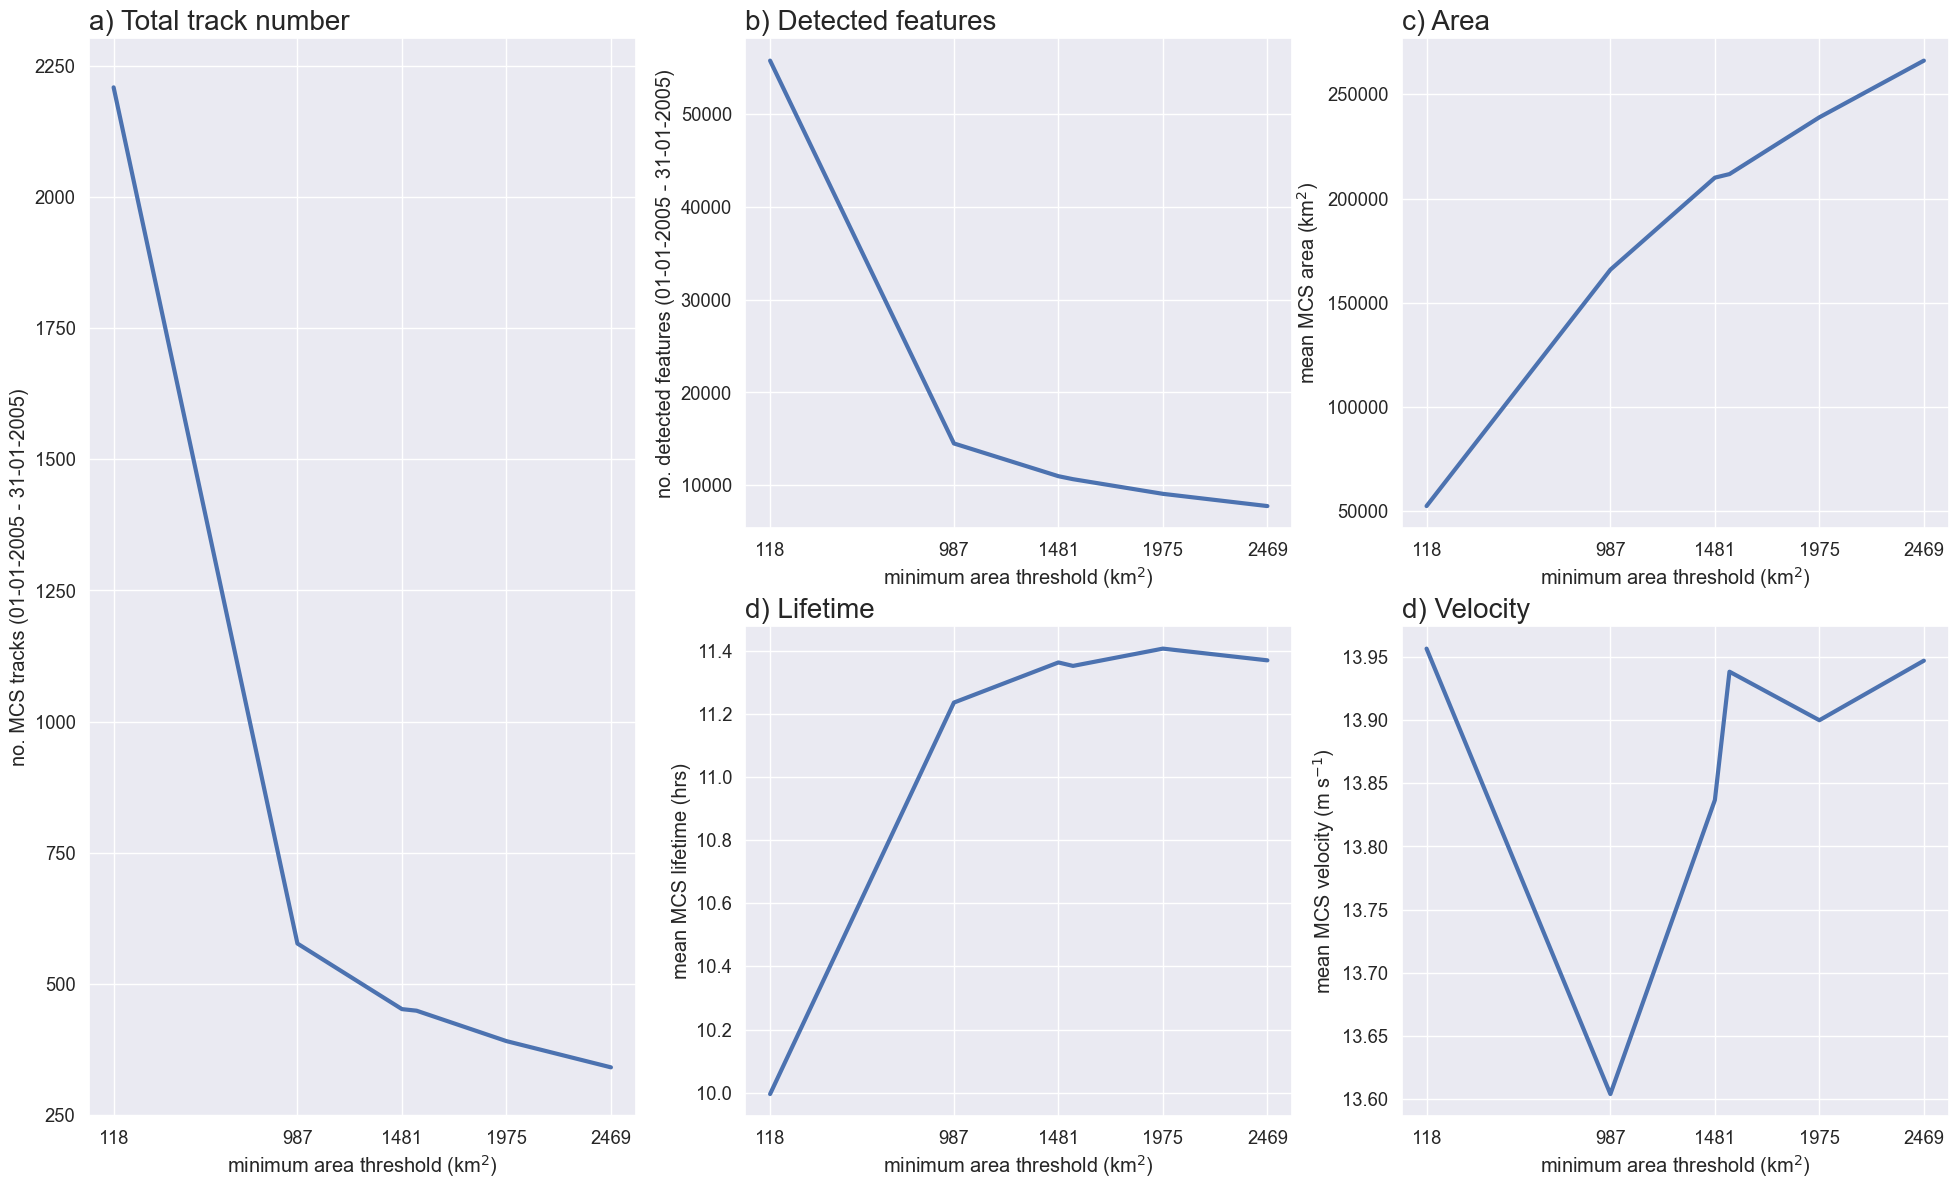

In [14]:
#plot of nminthreshold sensitivity analysis for MCSs
import seaborn as sns 
sns.set(font_scale=1.2)

plt.figure(figsize=(24,14))
f= 20
lf= 15

xticks=[118,987,1481,1975,2469]
ax1=plt.subplot(2,3,(1,4))
ax1.set_title('a) Total track number ', loc='left', fontsize= f )
ax1.plot(df['n_min_threshold'],df['num_tracks'],linewidth=3)
ax1.set_xticks(xticks)
ax1.set_ylabel('no. MCS tracks (01-01-2005 - 31-01-2005)')
ax1.set_xlabel('minimum area threshold (km$^{2}$)')

ax2=plt.subplot(2,3,2)
ax2.set_title('b) Detected features ', loc='left', fontsize= f )
ax2.plot(df['n_min_threshold'],df['num_features'],linewidth=3)
ax2.set_xticks(xticks)
ax2.set_ylabel('no. detected features (01-01-2005 - 31-01-2005)')
ax2.set_xlabel('minimum area threshold (km$^{2}$)')

ax3=plt.subplot(2,3,3)
ax3.set_title('c) Area ', loc='left', fontsize= f )
ax3.plot(df['n_min_threshold'],df['mean_area'],linewidth=3)
ax3.set_xticks(xticks)
ax3.set_ylabel('mean MCS area (km$^{2}$)')
ax3.set_xlabel('minimum area threshold (km$^{2}$)')

ax4=plt.subplot(2,3,5)
ax4.set_title('d) Lifetime ', loc='left', fontsize= f )
ax4.plot(df['n_min_threshold'],df['mean_lifetime'],linewidth=3)
ax4.set_xticks(xticks)
ax4.set_ylabel('mean MCS lifetime (hrs)')
ax4.set_xlabel('minimum area threshold (km$^{2}$)')

ax5=plt.subplot(2,3,6)
ax5.set_title('d) Velocity ', loc='left', fontsize= f )
ax5.plot(df['n_min_threshold'],df['mean_velocity'],linewidth=3)
ax5.set_xticks(xticks)
ax5.set_ylabel('mean MCS velocity (m s$^{-1}$)')
ax5.set_xlabel('minimum area threshold (km$^{2}$)')

plt.savefig('Plot/Jan_2005/nminthreshold/nminthreshold_analysis.png')
